# ML (stacking)

**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
telecom_users_dataframe = pd.read_csv('telecom_users.csv').drop(columns='Unnamed: 0')
telecom_users_dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Наличие пропущенных значений

In [3]:
telecom_users_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


Пропущенные значения отсутствую по всему датасету. Колонка `TotalCharges` имеет тип данных `object`, заменим на `float64` и переведем колонку `SeniorCitizen` в тип `object`

In [4]:
telecom_users_dataframe.TotalCharges = pd.to_numeric(telecom_users_dataframe.TotalCharges, errors='coerce')
telecom_users_dataframe.SeniorCitizen = telecom_users_dataframe.SeniorCitizen.astype(str)
telecom_users_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   object 
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [5]:
telecom_users_dataframe.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5976.000000
mean,32.468760,64.802213,2298.060617
std,24.516391,30.114702,2274.127165
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,404.312500
50%,29.000000,70.400000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


In [6]:
telecom_users_dataframe.describe(include=[np.object])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7639-OPLNG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


**Первые очевидные выводы, которые можно сделать:**:
* Средяя и медианная продолжительности удержания клиента примерно равны: 32 и 29 месяцев соответственно (2.5 года).
* Средний и медианный размеры оплат услуг клиентами примерно равны: 64.8 и 70.4 у.е. соответственно.
* Медианная сумма оплаченных услуг каждым клиентом (1412 у.е.) гораздо меньше средней (2298 у.е.). При том что средние и медианные продолжительности и размера оплаты практически не отличаются. Это может говорить о том, распределение клиентов по сумме оплаченных услуг является неранвомерным.

**Более делатьный разбор данных**

Распределение числовых данных

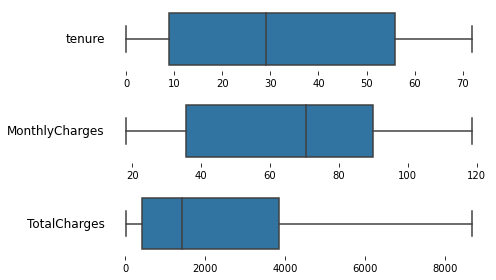

In [7]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

telecom_users_dataframe_float = telecom_users_dataframe[columns]

fig, axes = plt.subplots(3, 1, figsize=(7, 4))
position = 1

for ax, column in zip(axes.ravel(), columns):

    sns.boxplot(data=telecom_users_dataframe_float[column], orient='h', ax=ax)
    ax.set_yticks([])
    ax.set_ylabel(column, rotation='horizontal', horizontalalignment='right', verticalalignment='center', fontsize=12)

    position += 1
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

plt.tight_layout()
plt.show()

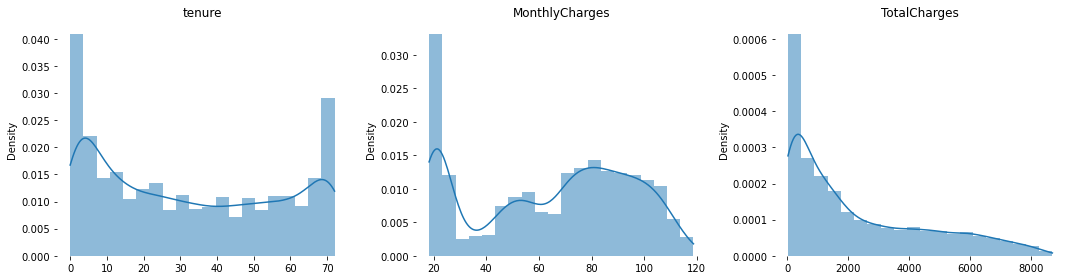

In [8]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

telecom_users_dataframe_float = telecom_users_dataframe[columns]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, column in zip(axes.ravel(), columns):
    sns.histplot(telecom_users_dataframe_float[column], bins=20, kde=True, stat="density", linewidth=0, ax=ax)
    
    ax.set_title(column, fontsize=12)
    ax.set_xlabel(None)
#     ax.set_ylabel('Count new students per month', fontsize=10)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

plt.tight_layout()
plt.show()

* Первое, на что стоит обратить внимание - отсутствие выбросов.
* Гистограмма длительности удержания клиента имеет равномерное распределение за исклчюением длительности до 5-ти месяцев и больше 65. Количество клиентов компании, которые пользуются её услугами 5 месяцев гораздо больше чем 10 и более месяцев, что может говорить о сильном оттоке клиентов в первые месяцы получения услуг компанией.
* Месячный размер оплаты имеет 3 видимых кластера. Что неудивительно ведь список услуг, которыми пользуется клиент не является величиной непрерываной.
* Как предполагалось ранее, распределение клиентов по сумме оплаченных услуг является неранвомерным, а точнее имеет гамма-распределение. Это подтверждает гипотезу, что большинство клиентов уходят в первые месяцы использования услуг компании. Она будет проверена в следующем блоке.

Описание категориальных данных

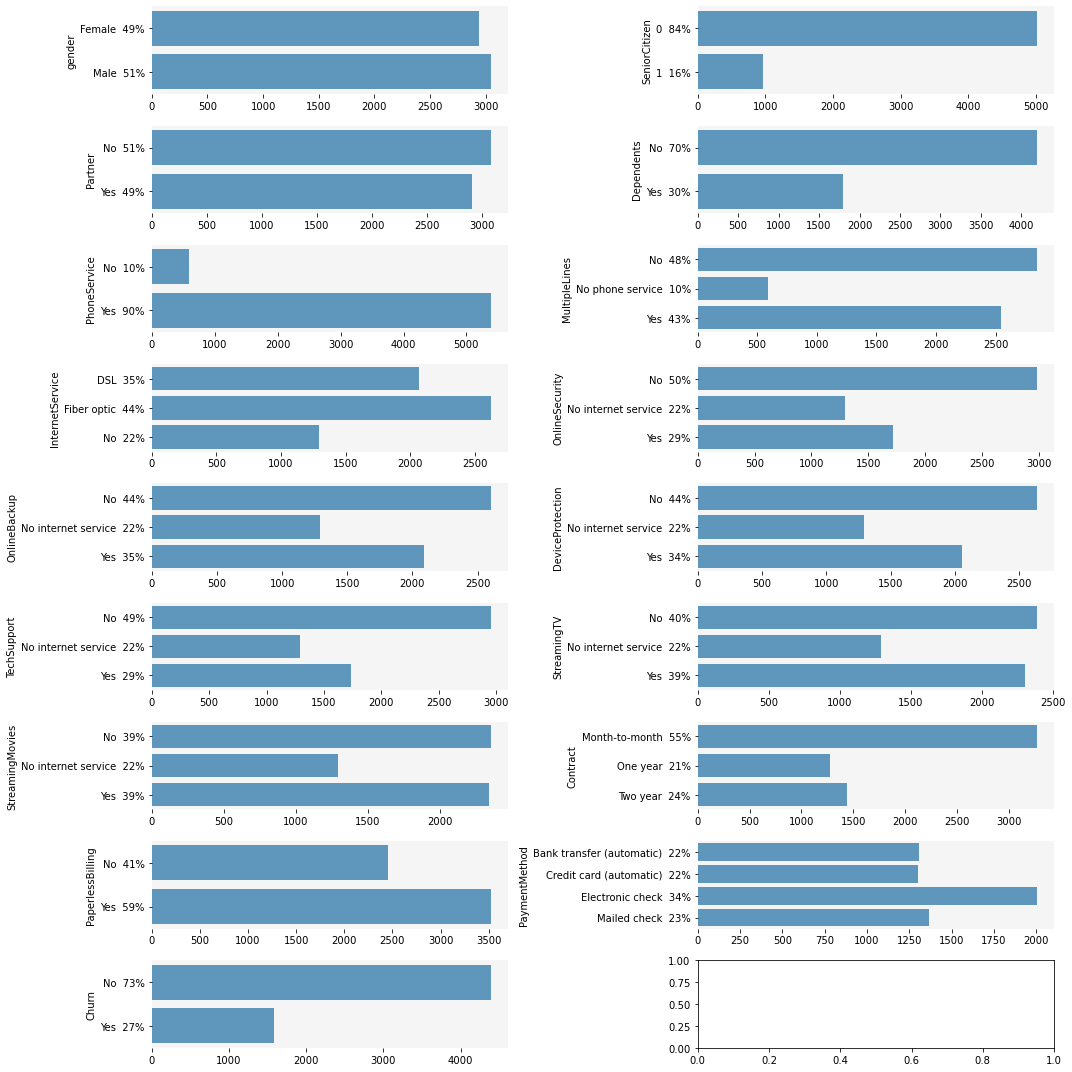

In [9]:
telecom_users_dataframe_object = telecom_users_dataframe.select_dtypes(include=['object']).copy()
columns = telecom_users_dataframe_object.columns

width = 2
if (len(columns)-1)%width == 0:
    height = (len(columns)-1)//width
else:
    height = (len(columns)-1)//width + 1

fig, axes = plt.subplots(height, width, figsize=(15, 15))

columns_for_cicle = columns[1:]

for ax, column in zip(axes.ravel(), columns_for_cicle):

    data = telecom_users_dataframe_object[['customerID', column]]
    grouped_data = data.groupby(column).count()
    
    color = plt.get_cmap('Blues')(150)
    ax.set_facecolor('whitesmoke')
    
    sns.barplot(y=grouped_data.index, x=grouped_data.customerID.values, ax=ax, alpha=1, color=color)
    
    grouped_data_1 = \
        data.groupby(column)\
        .count()\
        .apply(lambda x: 100 * x / x.sum())\
        .unstack(level=0)
    
    ax.set_yticks(range(len(grouped_data)))
    ax.set_yticklabels([index + '  ' + '{:.0f}'.format(percent) + '%' 
                        for index, percent 
                        in zip(grouped_data.index.values, grouped_data_1.customerID.values)])

# grouped_data.customerID.Female 
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

plt.tight_layout()
plt.show()

Полагаю тут не нужны комментарии, вся информация показана на гистограммах

# 2. Исследование зависимостей и формулирование гипотез

**Проверка первой гипотезы, найденной в предыдущем разделе. Сравнение распределения длительности получения услуг клиентом среди клиентов, которые ушли, и клиетнов, которые в настоящее время пользуются услугами данной компании:**

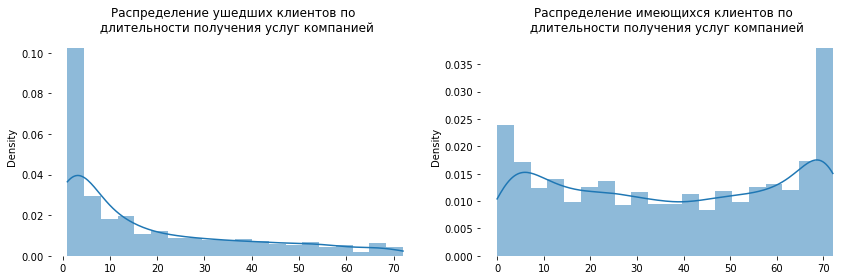

In [10]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, churn in zip(axes.ravel(), ['Yes', 'No']):
    
    data = telecom_users_dataframe[telecom_users_dataframe.Churn==churn].tenure
    sns.histplot(data, bins=20, kde=True, stat="density", linewidth=0, ax=ax)
    
    if churn == 'Yes':
        title = 'Распределение ушедших клиентов по \n длительности получения услуг компанией'
    else:
        title = 'Распределение имеющихся клиентов по \n длительности получения услуг компанией'
        
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(None)
#     ax.set_ylabel('Count new students per month', fontsize=10)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()

Да, дейстивельно, наибольший отток клиентов происходит в первый год.

**Распределение стоимости услуг**

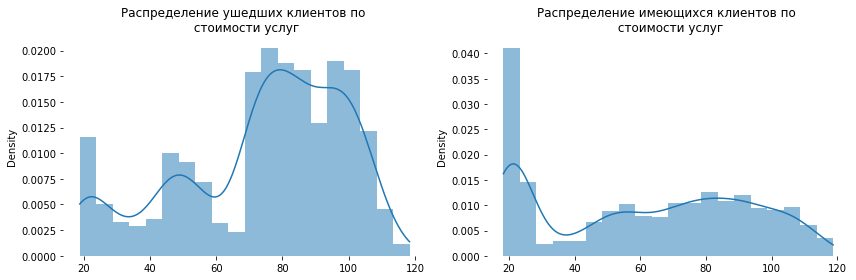

In [11]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, churn in zip(axes.ravel(), ['Yes', 'No']):
    
    data = telecom_users_dataframe[telecom_users_dataframe.Churn==churn].MonthlyCharges
    sns.histplot(data, bins=20, kde=True, stat="density", linewidth=0, ax=ax)
    
    if churn == 'Yes':
        title = 'Распределение ушедших клиентов по \n стоимости услуг'
    else:
        title = 'Распределение имеющихся клиентов по \n стоимости услуг'
        
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(None)
#     ax.set_ylabel('Count new students per month', fontsize=10)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()

Есть большая разница в распределении ушедших и текущих клиентов по размеру ежемесячной оплаты услуг. Визуально, доля ушедших клиентов, которые платили до 35 у.е. в месяц намного меньше доли клиентов которые продолжают пользоваться услугами компании. Можно предположить, что вероятность ухода клиента который платит до 35 у.е меньше, чем того, кто платит больше.

**Суммарная стоимость услуг является производной двух предых метрик. Стоит взглянуть, не собирает ли этот столбец выводы из двух предыдущих.**

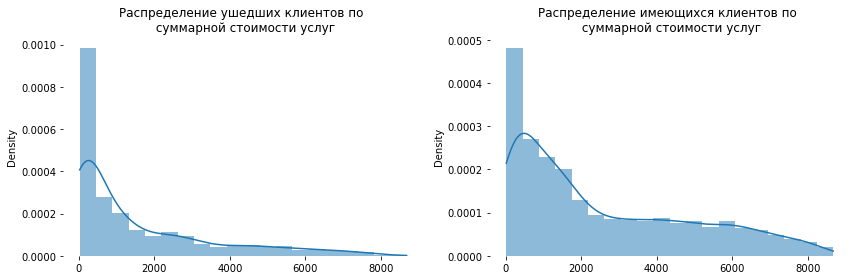

In [12]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, churn in zip(axes.ravel(), ['Yes', 'No']):
    
    data = telecom_users_dataframe[telecom_users_dataframe.Churn==churn].TotalCharges
    sns.histplot(data, bins=20, kde=True, stat="density", linewidth=0, ax=ax)
    
    if churn == 'Yes':
        title = 'Распределение ушедших клиентов по \n суммарной стоимости услуг'
    else:
        title = 'Распределение имеющихся клиентов по \n суммарной стоимости услуг'
        
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(None)
#     ax.set_ylabel('Count new students per month', fontsize=10)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()

Нет, эта метрика не нужна для дальнейших исследований.

Среди некоторых непрерывных и категориальных данных визуально найдены данные, которые можно разделить на 2 категории, которые, предположительно, могут отделить группу с большей степенью ухода клиента от меньшей.

**Поиск закономерностей по уходу клиентов среди категориальных данных**

In [13]:
def horizontal_plot(dataframe, column, category_names, ax):
    
    grouped_data = dataframe[['customerID', column, 'Churn']].groupby([column, 'Churn']).count().unstack(level=1)
    labels = grouped_data.index.values
    data = grouped_data.values

    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Blues')(np.linspace(0.55, 0.7, data.shape[1]))
    
#     grouped_data_percent = \
#         dataframe[['customerID', column]].groupby(column)\
#         .count()\
#         .apply(lambda x: 100 * x / x.sum())\
#         .unstack()
    
#     percent_labels = grouped_data_percent.values

    ax.invert_yaxis()
#     ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title(column, fontsize=14)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_facecolor('whitesmoke')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.6,
                label=colname, color=color)
        xcenters = starts + widths / 2
        
        percent_left_customers = data[:, i] / data_cum[:, i] * 100

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, '{:.0f}'.format(c), ha='center', va='center',
                        color=text_color, fontsize=12)
        
        ax.set_yticks(range(len(percent_left_customers)))
        ax.set_yticklabels([label + '  ' + '{:.0f}'.format(percent) + '%' 
                            for label, percent 
                            in zip(labels, percent_left_customers)])
        
    return ax, category_names

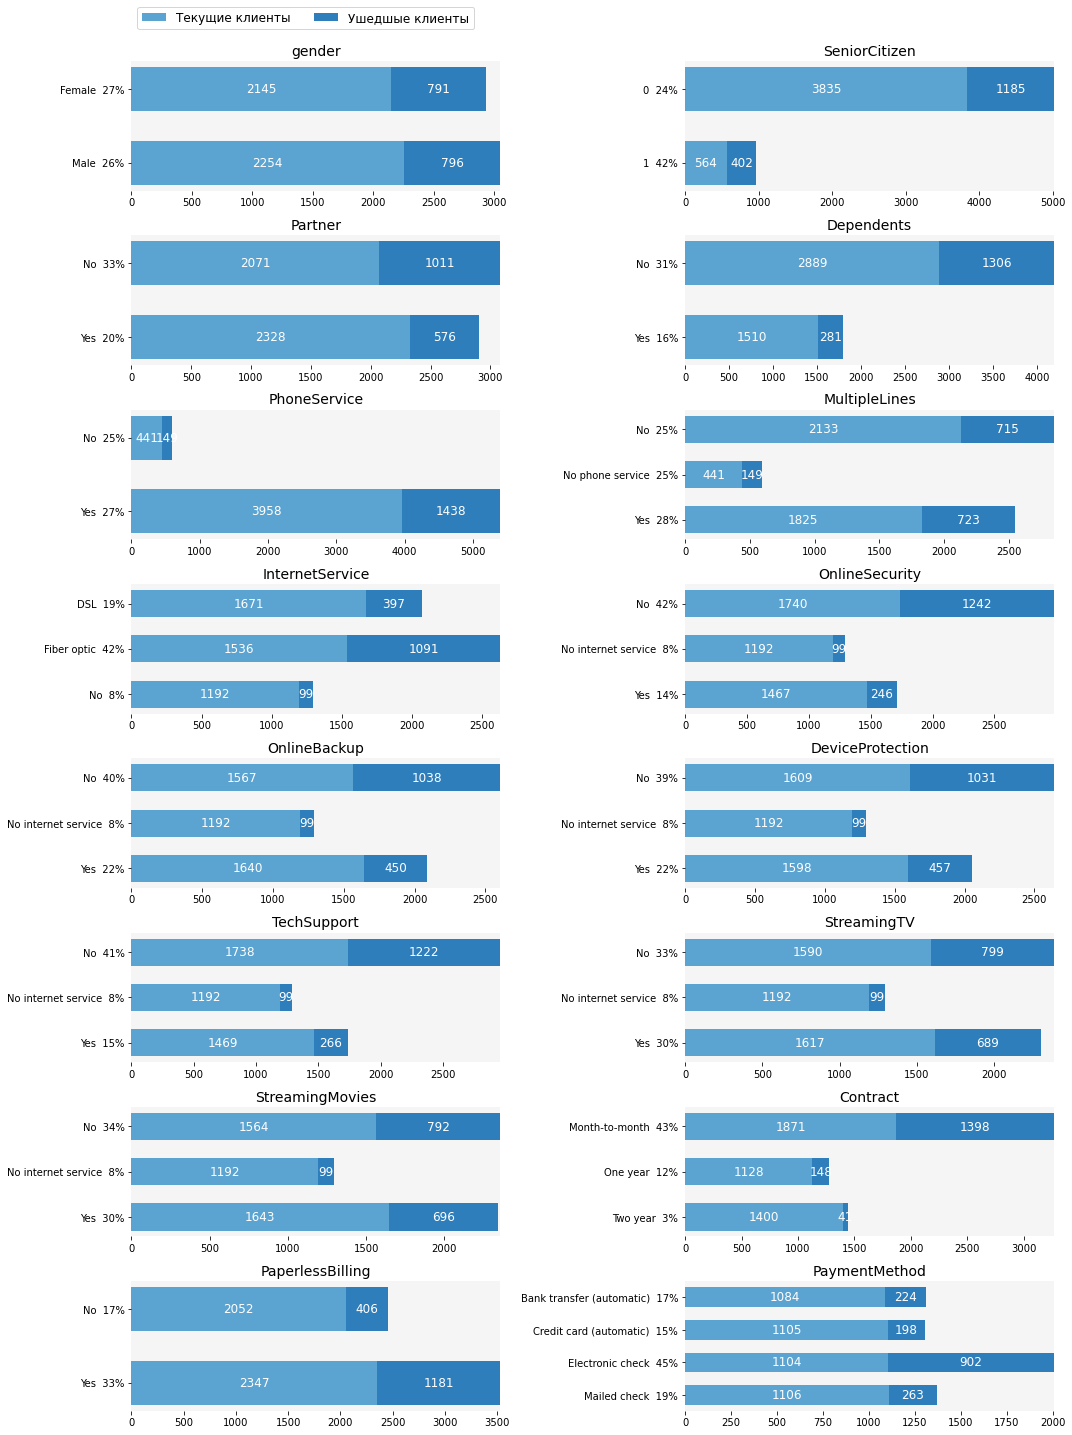

In [14]:
telecom_users_dataframe_object = telecom_users_dataframe.select_dtypes(include=['object']).copy()
columns = telecom_users_dataframe_object.columns
category_names = ['Текущие клиенты', 'Ушедшые клиенты']
group_column_names = ['Churn', 'customerID']
columns_for_cicle = [x for x in columns.values.tolist() if x not in group_column_names]


width = 2
if (len(columns_for_cicle)-1)%width == 0:
    height = (len(columns_for_cicle)-1)//width
else:
    height = (len(columns_for_cicle)-1)//width + 1

showed_label = False
fig, axes = plt.subplots(height, width, figsize=(15, 20))
for ax, column in zip(axes.ravel(), columns_for_cicle):
    
    ax, category_names = horizontal_plot(telecom_users_dataframe_object, column, category_names, ax)
    if not showed_label:
        ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1.2), loc='lower left', fontsize='large')
        showed_label = True
        
plt.tight_layout()

**Процент ухода клиентов по категориям:**
* Среди мужчин и женщин он практически равен: 26% и 27% соответственно
* Среди пенсионеров 42% перестали пользоваться услугами компании, среди непенсионеров их доля составляет 24%
* Среди кто находится вне брака процент уходов несколько выше чем у тек кто в нем (32% против 20%)
* Средите у кого есть иживежци процент намного ниже 16% (против 31%)
* По наличию или отсутствию подключенной телефонной связи нет различий (27% и 25%)
* То же по подключению одной или нескольких телефонных линий
* Наибольший процент уходов среди клиентов, интернет провайдер которых `Fiber optic` - 42%, среди `DSL` - 19% среди тех у кого интернет не подключен - 8%
* Среди дополнительных услуг: онлайн-безопасность, резервное хранение, страховка, тех. поддержка цифры почти не отличаются: процент ухода 40% среди клиентов, которые этими доп. услугами не пользуются, 20% среди тех кто пользуется.
* Среди пользователей стримингового телевиденья и стримингового кино: кто пользуется процент ухода 33%, кто нет - 30%
* Среди тех кто пользуется бумажной оплатой счетов процент ухода - 33%, кто безбумажным - 17%
* По длительности контракта огромный профент уходов клиентов среди с месячным контрактом - 43%, в то время как клиентов в годовым и двух годовым контрактами процент ухода 12% и 3% соответственно.
* Среди способов оплаты выделяется лишь электронный чек, среди тех кто пользуется таким способом оплаты процент ухода 45%, у остальных же методов 15-19%.

Потенциально наиболее весомые колонки для поиска уходящего клиента, при условии, что они имеют междусобой низкую корреляцию: являтеся ли клиент пенсионером, название интренет провайдера, использование клиентом дополнительных услуг (безопасноть, тех. поддуржка и пр.), платит ли клент электронным чеком, длительность контракта.

**Поиск коррелируемых между собой и с оттоком клиетов метрик**

Перевод категориальных данных в токенизированные с помощью `pandas`

In [60]:
figured_data = telecom_users_dataframe.copy()

object_colums = figured_data.loc[:, figured_data.dtypes == np.object].columns[1:]
for column in object_colums:
    figured_data[column] = figured_data[column].astype('category')
    
figured_data[object_colums] = figured_data[object_colums].apply(lambda x: x.cat.codes)
figured_data.drop(columns=['customerID'], inplace=True)
figured_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
5982,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
5983,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
5984,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


Предположительно, корреляции могут быть между:
   * Достижением пенсионного возраста, в браке/вне брака, наличие людей на обеспечении с видами услуг
   * Достижением пенсионного возраста и способом оплаты
   * Услугами по онлайн безопасности, резервного копирования, страховка оборудования, наличие тех. поддержки и интернет-профайдер клиента мужду собой и размером ежемесячного платежа клиентами.
   * Стриминговое телевиденье и стриминговое кино
   * Наличие партнера и наличие людей на обеспечении

<AxesSubplot:title={'center':'Корреляция признаков'}>

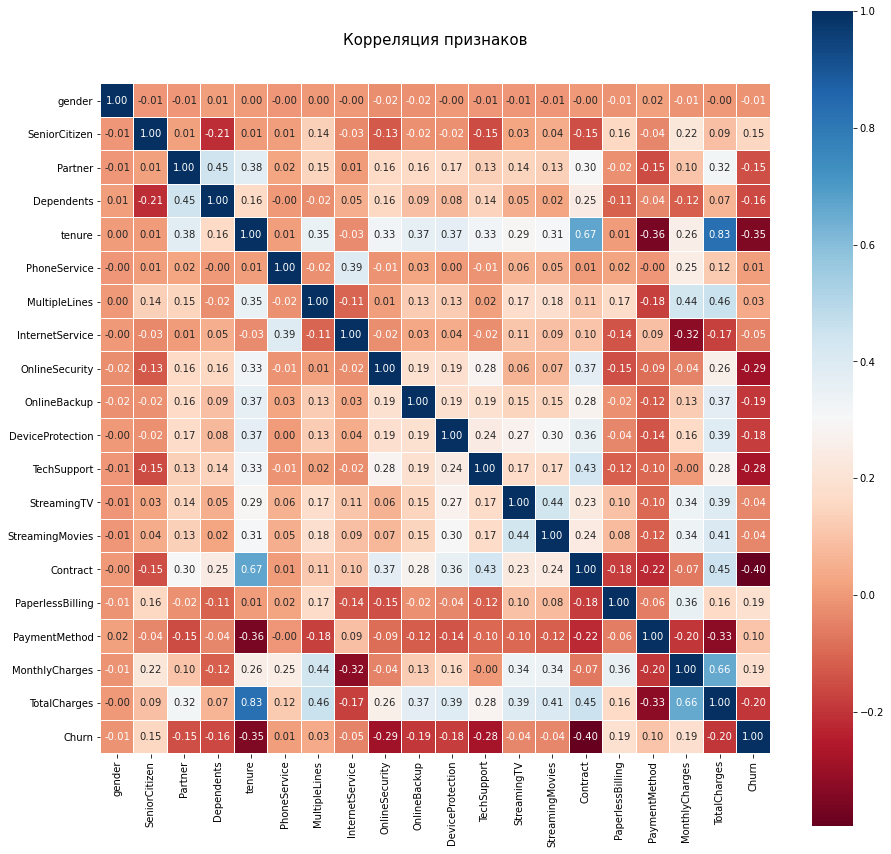

In [59]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
plt.title('Корреляция признаков', y=1.05, size=15)
sns.heatmap(figured_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2f')

Перевод категориальных данных в токенизированные вручную

In [62]:
from sklearn.preprocessing import MinMaxScaler

figured_data = telecom_users_dataframe.copy()

figured_data['gender'] = figured_data['gender'].map({'Male': 0, 'Female': 1})
figured_data['SeniorCitizen'] = figured_data['SeniorCitizen'].astype(int)
figured_data['Partner'] = figured_data['Partner'].map({'No': 0, 'Yes': 1})
figured_data['Dependents'] = figured_data['Dependents'].map({'No': 0, 'Yes': 1})
figured_data['PhoneService'] = figured_data['PhoneService'].map({'No': 0, 'Yes': 1})
figured_data['MultipleLines'] = figured_data['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
figured_data['InternetService'] = figured_data['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
figured_data['OnlineSecurity'] = figured_data['OnlineSecurity'].map({'No internet service': 0, 'No': 2, 'Yes': 1})
figured_data['OnlineBackup'] = figured_data['OnlineBackup'].map({'No internet service': 0, 'No': 2, 'Yes': 1})
figured_data['DeviceProtection'] = figured_data['DeviceProtection'].map({'No internet service': 0, 'No': 2, 'Yes': 1})
figured_data['TechSupport'] = figured_data['TechSupport'].map({'No internet service': 0, 'No': 2, 'Yes': 1})
figured_data['StreamingTV'] = figured_data['StreamingTV'].map({'No internet service': 0, 'No': 2, 'Yes': 1})
figured_data['StreamingMovies'] = figured_data['StreamingMovies'].map({'No internet service': 0, 'No': 2, 'Yes': 1})
figured_data['Contract'] = figured_data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
figured_data['PaperlessBilling'] = figured_data['PaperlessBilling'].map({'No': 0, 'Yes': 1})
figured_data['PaymentMethod'] = figured_data['PaymentMethod'].map({
    'Bank transfer (automatic)': 0, 
    'Credit card (automatic)': 1,
    'Electronic check': 2,
    'Mailed check': 3
})
figured_data['Churn'] = figured_data['Churn'].map({'No': 0, 'Yes': 1})
# Удаление TotalCharges потому что эти данные, как было ранее выяснено, не помогут в предсказательной модели
figured_data.drop(columns=['TotalCharges', 'customerID'], inplace=True)
# # Выполнение нормализации MonthlyCharges и tenure
# figured_data['tenure'] = MinMaxScaler().fit_transform(figured_data['tenure'].values.reshape(-1, 1)).reshape(-1)
# figured_data['MonthlyCharges'] = MinMaxScaler().fit_transform(figured_data['MonthlyCharges'].values.reshape(-1, 1)).reshape(-1)
figured_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,1,72,1,2,0,0,0,0,0,0,0,2,0,1,24.10,0
1,1,0,0,0,44,1,1,2,2,1,1,2,1,2,0,1,1,88.15,0
2,1,1,1,0,38,1,2,2,2,2,2,2,2,2,0,1,0,74.95,1
3,0,0,0,0,4,1,1,1,2,2,2,2,2,1,0,1,2,55.90,0
4,0,0,0,0,2,1,1,1,1,2,1,2,2,2,0,0,2,53.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,1,0,1,1,1,2,1,2,2,2,1,1,0,1,2,95.00,1
5982,1,0,1,1,23,1,2,1,1,1,1,1,1,1,2,1,1,91.10,0
5983,0,0,1,1,12,1,1,0,0,0,0,0,0,0,0,1,2,21.15,0
5984,0,1,0,0,12,1,2,2,2,2,1,2,1,1,0,1,2,99.45,1


<AxesSubplot:title={'center':'Корреляция признаков'}>

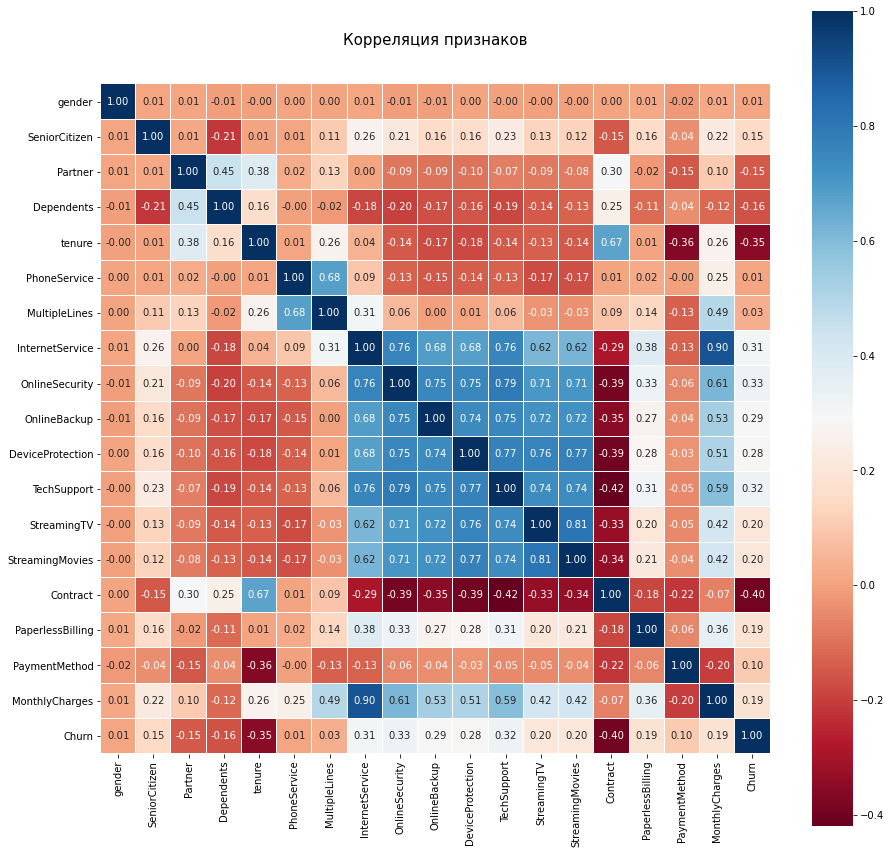

In [63]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
plt.title('Корреляция признаков', y=1.05, size=15)
sns.heatmap(figured_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2f')

**Выводы:**
* Достижение пенсионного возраста имеет слабую обратную корреляцию с наличием людей на обеспечении, гипотеза подтвердилась, но слишком слабо, чтобы убрать один из этих признаков.
* Наличие партнера имеет среднюю прямую корреляцию с наличием людей на обеспечении и, чего не было среди гипотез, длительностью использования услуг компании. Не ясно стоит ли убирать параметр `Partner` (он имеет немного меньшую корреляцию с `Chum` нежели `Dependents`).
* Достижение пенсионного возраста не влияет на способ оплаты
* Наименование провайдера совместно с доп. интернет-услугами имеют высокую степень корреляции между собой, а так же со стриминговыми сервисами.
* Месячный размер оплаты услуг имеет очень высокую степень коррелялии с наименованием интернет провайдера или его отсутствием (90%)
* Тип контракта по длительности и длительность получения услуг компанией имеют среднюю корреляцию.
* Тип контракта по длиетльности имеет слабую обратную корреляцию с наличием дополнительных услуг интернет-провайдера.

Метрик, которые бы давали среднюю корреляцию с оттоком клиентов нет. Слабую корреляцию с целевой переменной имеют: длительность сотрудничества с компанией, тип контракта, и тип провайдера.

# 3. Построение моделей для прогнозирования оттока

 Классы распределены неравномерно: 27% против 73%, поэтому аккуратность тут не совсем верная метрика качества. Можно использовать полноту, но в таком случае компания будет предлагать много выгодынх предложений клиентам, которые уходить не собирались, поэтому нужно чтобы и точность принимала участие в определении качества модели. Поэтому будет использоваться AUC-ROC.

In [66]:
from sklearn.metrics import roc_auc_score

Сравниваться будут различные вариации стекинга

In [95]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings('ignore')

**Очистка признаков**

**Для начала посмотрим на важность признаков для xgboost**

In [68]:
y = figured_data['Churn']
x = figured_data.drop(columns=['Churn'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)

features = pd.DataFrame(x)
targets = pd.Series(y)

[12:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Качество модели:  0.5574572127139364


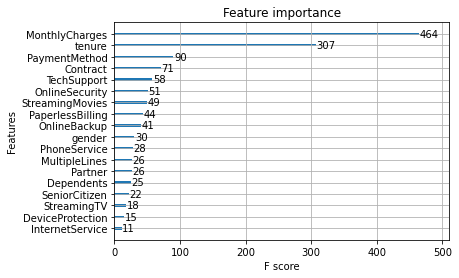

In [69]:
from sklearn.metrics import f1_score

def xgb_model_func(x_train, y_train, x_test, y_test):
    
    skf = StratifiedKFold(n_splits=5, random_state=17)
    dtrain = xgb.DMatrix(x_train, y_train)
    dtest = xgb.DMatrix(x_test, y_test)

    params = {'objective': 'binary:logistic',
              'max_depth': 5,
              'eta': 0.1}

    num_rounds = 60

    xgb_model = xgb.train(params, dtrain, num_rounds)
    prediction = xgb_model.predict(dtest)
    bool_prediction = np.multiply(prediction>0.5, 1)

    xgb.plot_importance(xgb_model)
    print('\nКачество модели: ', f1_score(bool_prediction, y_test))
    
    return xgb_model.get_score(importance_type='weight')

importance_weights = xgb_model_func(x_train, y_train, x_test, y_test)

Как предполагалось в предыдущем пункте, наиболее влиятельными (на метод деревьев решений) оказались: стоимость услуг и длительность использования услуг компании клиентом, а так же метод оплаты, тип контракта и наличие дополнительных сервисов. Кроме параметра является ли пользователь пенсионером.

In [70]:
len(x.columns) == len(importance_weights)

True

Нулевые признаки отсутствуют

Удаление коррелируемых признаков

In [71]:
# поиск количества коррелируемых фичей

def count_correlation_features(dataframe, max_correlation):
    
    count = 0
    corr_matrix = dataframe.astype(float).corr()
    dataframe_without_corr_features = dataframe.copy()
    
    for idx in dataframe_without_corr_features.columns:
        correlations = abs(corr_matrix.loc[idx]) > max_correlation
        for corr_feature in correlations[correlations].index.values[1:]:
            if corr_feature != idx and corr_feature in dataframe_without_corr_features.columns:
                dataframe_without_corr_features.drop(columns=[corr_feature], inplace=True)
                count += 1

    return count

In [72]:
pca_count_features = len(x.columns) - count_correlation_features(x, 0.7)
pca_count_features

11

Проведение трансформации числовых данных и понижение размерности 

In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11).fit(x)
pca_x = pca.transform(x)
pca_x

array([[-1.97817320e+01,  5.32981598e+01, -7.15616802e-01, ...,
         1.53829722e-02, -3.59994188e-01,  4.09201826e-02],
       [ 2.60540656e+01,  3.24665583e-01,  3.66853683e-01, ...,
         1.99862978e-01,  3.93306342e-01,  2.33924123e-01],
       [ 1.16187587e+01,  5.48113567e-01,  1.81233029e+00, ...,
        -2.99172207e-01, -3.17066414e-01,  2.71106962e-01],
       ...,
       [-4.82854948e+01,  3.88239671e-01, -1.78244153e+00, ...,
        -3.35992925e-01,  3.40182404e-01, -2.86480537e-01],
       [ 2.24816684e+01, -3.33995325e+01, -1.23545185e+00, ...,
        -3.90582222e-01, -7.13155028e-01,  2.34634406e-01],
       [-4.34722269e+01,  1.36227491e+01, -1.39160416e+00, ...,
         2.97069333e-01,  1.55592107e-02,  2.46192431e-02]])

**Построение моделей на данных до понижения размерности**

In [216]:
# разбиение данных для подбора оптимальных параметров моделей

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=17)
x_train, m_x_train, y_train, m_y_train = train_test_split(data_x_train, data_y_train, test_size=.3, random_state=17)

In [180]:
def make_meta_data(models, x):

    meta_mtrx = np.empty((x.shape[0], len(models)))
    for n, model in enumerate(models):
        # присвоение признаков для метаалгоритма
        meta_mtrx[:, n] = model.predict(x)
            
    return meta_mtrx

Подбор параметров базовых алгоритмов

In [181]:
gbc = GradientBoostingClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17)
svc = SVC(random_state=17)
knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()
lr = LogisticRegression(random_state=17)
skf = StratifiedKFold(n_splits=3, random_state=17)
xgb = XGBClassifier(eval_metric='logloss', random_state=17)

In [182]:
gbc_params = {
    'learning_rate': np.arange(0.1, 0.6, 0.1),
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': np.arange(1, 7, 1)
}

knn1_params = {
    'n_neighbors': np.arange(1, 11, 1),
}

knn2_params = {
    'n_neighbors': np.arange(11, 50, 2),
}

rfc_params = {
    'n_estimators': range(10, 100, 10),
    'max_depth': np.arange(1, 7, 1)
}

svc_params = {
    'C': np.arange(0.1, 1, 0.2),
    'degree': np.arange(1, 10, 1),
    'class_weight': ['balanced', None]
}

lr_params = {
    'C': np.arange(0.5, 1, 0.1),
    'class_weight': ['balanced', None]
}

xgb_params = {
    'n_estimators': range(10, 100, 10),   
    'eta': np.arange(0.1, 1., .1),
    'max_depth': range(2, 11, 1),
}

In [200]:
gbc_grid = GridSearchCV(gbc, gbc_params,  cv=skf, scoring='roc_auc')
gbc_model = gbc_grid.fit(x_train, y_train)
print('gbc_model: {}'.format(gbc_model.best_params_))

In [ ]:
knn1_grid = GridSearchCV(knn1, knn1_params,  cv=skf, scoring='roc_auc')
knn1_model = knn1_grid.fit(x_train, y_train)
print('knn1_model: {}'.format(knn1_model.best_params_))

In [ ]:
knn2_grid = GridSearchCV(knn2, knn2_params,  cv=skf, scoring='roc_auc')
knn2_model = knn2_grid.fit(x_train, y_train)
print('knn2_model: {}'.format(knn2_model.best_params_))

In [ ]:
rfc_grid = GridSearchCV(rfc, rfc_params,  cv=skf)
rfc_model = rfc_grid.fit(x_train, y_train)
print('rfc_model: {}'.format(rfc_model.best_params_))

In [ ]:
svc_grid = GridSearchCV(svc, svc_params,  cv=skf, scoring='roc_auc')
svc_model = svc_grid.fit(x_train, y_train)
print('svc_model: {}'.format(svc_model.best_params_))

In [ ]:
lr_grid = GridSearchCV(lr, lr_params,  cv=skf, scoring='roc_auc')
lr_model = lr_grid.fit(x_train, y_train)
print('lr_model: {}'.format(lr_model.best_params_))

In [ ]:
xgb_grid = GridSearchCV(xgb, xgb_params,  cv=skf, scoring='roc_auc')
xgb_model = xgb_grid.fit(x_train, y_train)
print('xgb_model: {}'.format(xgb_model.best_params_))

Подбор параметров для метаалгоритма

In [ ]:
meta_matrix = make_meta_data(models, m_x_train)

In [ ]:
xgb_meta_params = xgb_params
gbc_meta_params = gbc_params
rfc_meta_params = rfc_params
svc_meta_params = svc_params
lr_meta_params = lr_params 

xgb_meta = XGBClassifier(eval_metric='logloss', random_state=17)
rfc_meta = RandomForestClassifier(random_state=17)
svc_meta = SVC(random_state=17)
lr_meta = LogisticRegression(random_state=17)
gbc_meta = GradientBoostingClassifier(random_state=17)

In [ ]:
gbc_meta_grid = GridSearchCV(gbc_meta, gbc_meta_params,  cv=skf, scoring='roc_auc')
gbc_meta_model = gbc_meta_grid.fit(meta_matrix, m_y_train)
print('gbc_meta_model: {}'.format(gbc_meta_model.best_params_))

In [ ]:
xgb_meta_grid = GridSearchCV(xgb_meta, xgb_meta_params,  cv=skf, scoring='roc_auc')
xgb_meta_model = xgb_meta_grid.fit(meta_matrix, m_y_train)
print('xgb_meta_model: {}'.format(xgb_meta_model.best_params_))

In [ ]:
rfc_meta_grid = GridSearchCV(rfc_meta, rfc_meta_params,  cv=skf, scoring='roc_auc')
rfc_meta_model = rfc_meta_grid.fit(meta_matrix, m_y_train)
print('rfc_meta_model: {}'.format(rfc_meta_model.best_params_))

In [ ]:
svc_meta_grid = GridSearchCV(svc_meta, svc_meta_params,  cv=skf, scoring='roc_auc')
svc_meta_model = svc_meta_grid.fit(meta_matrix, m_y_train)
print('svc_meta_model: {}'.format(svc_meta_model.best_params_))

In [ ]:
lr_meta_grid = GridSearchCV(lr_meta, lr_meta_params,  cv=skf, scoring='roc_auc')
lr_meta_model = lr_meta_grid.fit(meta_matrix, m_y_train)
print('lr_meta_model: {}'.format(lr_meta_model.best_params_))

Обучение моделей с подобранным параметрами на полном датасете

In [113]:
from sklearn.multioutput import MultiOutputClassifier

In [217]:
base_algoritms = [
    ('knn1', KNeighborsClassifier(n_neighbors=10, metric='euclidean')),
    ('knn2', KNeighborsClassifier(n_neighbors=40, metric='euclidean')),
    ('gbc', GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=70, random_state=17)),
    ('rfc', RandomForestClassifier(max_depth=4, n_estimators=10, random_state=17)),
    ('svc', SVC(C=0.9, class_weight='balanced', degree=1, random_state=17, probability=True)),
    ('lr', LogisticRegression(C=0.5, class_weight=None, random_state=17)),
    ('xgb', XGBClassifier(eta=0.4, max_depth=2, n_estimators=30, eval_metric='logloss', random_state=17))
]

fitted_base_algoritms = []
# обучение базовых алгоритмов (для опредедления точности базовых алгоритмов)
for title, model in base_algoritms:
    clf = MultiOutputClassifier(model).fit(data_x_train, data_y_train.values.reshape(-1, 1))
    fitted_base_algoritms.append((title, clf))

In [218]:
meta_estimators = [
    ('gbc_meta', GradientBoostingClassifier(learning_rate=0.1, max_depth=1, n_estimators=60, random_state=17)),
    ('rfc_meta', RandomForestClassifier(max_depth=2, n_estimators=50, random_state=17)),
    ('svc_meta', SVC(C=0.3, class_weight=None, degree=1, random_state=17, probability=True)),
    ('lr_meta', LogisticRegression(C=0.5, class_weight=None, random_state=17)),
    ('xgb_meta', XGBClassifier(eta=0.2, max_depth=2, n_estimators=20, eval_metric='logloss', random_state=17))
]

fitted_meta_algoritms = []
# обучение базовых метаалгоритмов (для опредедления точности мета алгоритмов)
for title, model in meta_estimators:
    reg = StackingClassifier(
        estimators=base_algoritms,
        final_estimator=model
    )
    clf = MultiOutputClassifier(reg).fit(data_x_train, data_y_train.values.reshape(-1, 1))
    fitted_meta_algoritms.append((title, clf))

# 4. Сравнение качества моделей 

Качество моделей, которые были обученны на данных до понижения размерности с помощью PCA

In [220]:
# библиотечные алгоритмы
for model_name, model in fitted_base_algoritms:
    prediction = np.transpose([y_pred[:, 1] for y_pred in model.predict_proba(data_x_test)])
    print('auc_roc_score {}: {}'.format(
        model_name, roc_auc_score(data_y_test.values.reshape(-1, 1), prediction, average=None)))

auc_roc_score knn1: 0.8001822469982847
auc_roc_score knn2: 0.8338997284162378
auc_roc_score gbc: 0.8603987993138937
auc_roc_score rfc: 0.8400300171526588
auc_roc_score svc: 0.8324578330474557
auc_roc_score lr: 0.8517116923956547
auc_roc_score xgb: 0.8608544168096056


In [221]:
# метаалгоритмы
for model_name, model in fitted_meta_algoritms:
    prediction = np.transpose([y_pred[:, 1] for y_pred in model.predict_proba(data_x_test)])
    print('auc_roc_score {}: {}'.format(
        model_name, roc_auc_score(data_y_test.values.reshape(-1, 1), prediction, average=None)))

auc_roc_score gbc_meta: 0.8591784591194969
auc_roc_score rfc_meta: 0.8572327044025158
auc_roc_score svc_meta: 0.7669793453401944
auc_roc_score lr_meta: 0.8595554602630074
auc_roc_score xgb_meta: 0.8588032447112636


Качество моделей, которые были обученны на данных после понижения размерности с помощью PCA

In [208]:
# библиотечные алгоритмы
for model_name, model in fitted_base_algoritms:
    prediction = np.transpose([y_pred[:, 1] for y_pred in model.predict_proba(data_x_test)])
    print('auc_roc_score {}: {}'.format(
        model_name, roc_auc_score(data_y_test.values.reshape(-1, 1), prediction, average=None)))

auc_roc_score knn1: 0.792208047455689
auc_roc_score knn2: 0.8337800171526586
auc_roc_score gbc: 0.8424063750714695
auc_roc_score rfc: 0.8284626929674099
auc_roc_score svc: 0.8315716123499142
auc_roc_score lr: 0.8522512864493997
auc_roc_score xgb: 0.8441359348198971


In [209]:
# метаалгоритмы
for model_name, model in fitted_meta_algoritms:
    prediction = np.transpose([y_pred[:, 1] for y_pred in model.predict_proba(data_x_test)])
    print('auc_roc_score {}: {}'.format(
        model_name, roc_auc_score(data_y_test.values.reshape(-1, 1), prediction, average=None)))

auc_roc_score gbc_meta: 0.8495247284162379
auc_roc_score rfc_meta: 0.8496194253859348
auc_roc_score svc_meta: 0.7529659805603203
auc_roc_score lr_meta: 0.8498642081189252
auc_roc_score xgb_meta: 0.8491316466552316


Модель даёт немного лучшие предсказания до pca переобразования, в среднем на 1%, при том что количество фичей было снижено на 30%.

Почти все модели имеют auc-roc больше 0.8, при этом, алгоритмы: градиентный бустинг и почти все метаалгоритмы дали auc-roc 0.85.

In [212]:
from sklearn.metrics import roc_curve

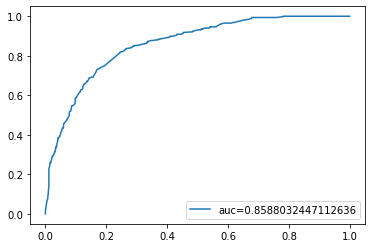

In [222]:
gbc_meta_model = fitted_meta_algoritms[0][1]

prediction = np.transpose([y_pred[:, 1] for y_pred in model.predict_proba(data_x_test)])
fpr, tpr, _ = roc_curve(data_y_test.values.reshape(-1, 1), prediction)
auc = roc_auc_score(data_y_test.values.reshape(-1, 1), prediction)
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)